## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Reed Whitcraft
# Full-Time
# Friday, March 8, 2019

In [3]:
# load initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### columns & descriptions
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


#### loading data & initial inspection

- Since we don't know the quality of our data, we need to explore what's inside, before we can even start

#### things to look out for:

- Missing data: are there a lot of missing rows or columns
- Improper datatypes: are certain fields improperly encoded as strings, instead of integers
- Unexpected values: are there columns with values that are impossible or unlikely - if so, this could be placeholder data for missing values

In [4]:
data = pd.read_csv("kc_house_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- Not a terrible amount of Null values, given 21,000+ rows
- The null values in waterfront might represent that the unit does not have a waterfront, but will have to see
- The null values in yr_renovated might represent houses that have not been renovated



In [8]:
questionable_basements = data.loc[data['sqft_basement'] == '?']
num_questionable_basements = len(questionable_basements)
print("number of questionable basements:", num_questionable_basements)

number of questionable basements: 454


- Given that this numeric column is currently saved as an object type (string), it's likely that the "?" means that either the square footage of a listing's basement is unknown, or the listing did not have a basement.  Given this, and the fact that none of our data have basement square footages of '0', and given the fact that, if a listing had a basement, it almost certainly would want that information included so that it could be priced into the selling price of the house, it is safe to assume that these are placeholders for 0.

- So, to correct the data, we would want to convert these '?' into 0, then convert the column type into integer

In [9]:
data.loc[data["sqft_basement"] == '?', 'sqft_basement'] = 0

- Year Renovated has some NaN values, so will replace those with 0
- And, now we will want to convert it to an integer, because it is incorrectly stored as a string

In [10]:
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [11]:
data.sqft_basement = data.sqft_basement.astype(np.float64)

In [12]:
data["yr_renovated"].fillna(0, inplace=True)

In [13]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
data_target = pd.DataFrame(data["price"], columns=["price"])

In [15]:
data_features = data.drop(['date'], axis=1)
data_features.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
def plot_scatter(data, start_index, end_index):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
    for xcol, ax in zip(list(data)[start_index:end_index], axes):
        data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

    

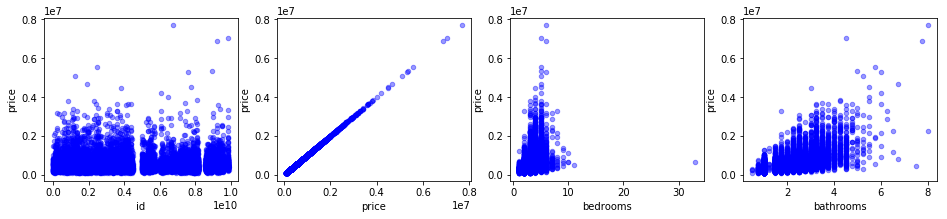

In [17]:
plot_scatter(data_features, 0, 4)

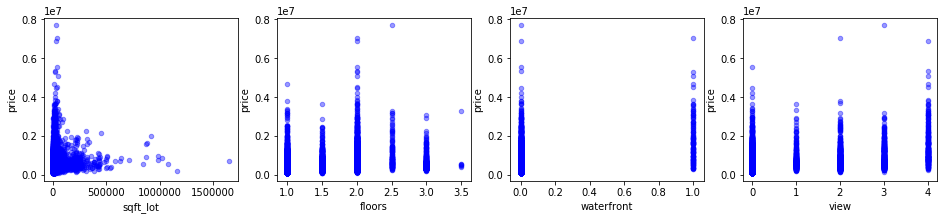

In [18]:
plot_scatter(data_features, 5, 9)

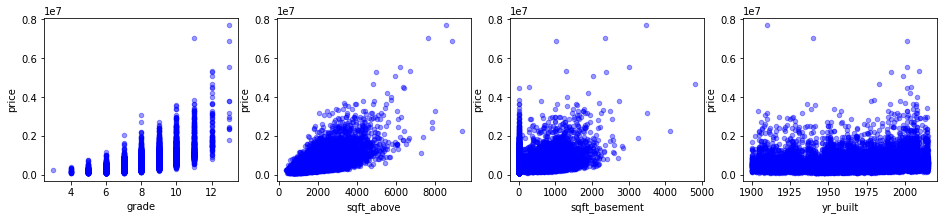

In [20]:
plot_scatter(data_features, 10, 14)

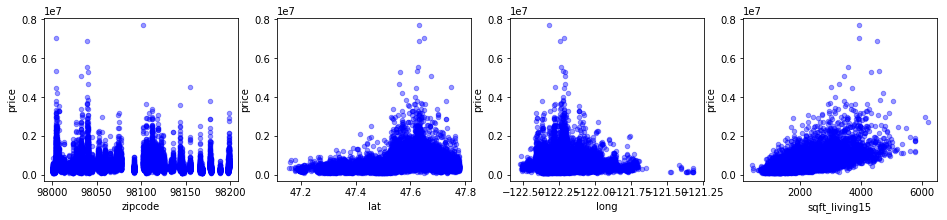

In [21]:
plot_scatter(data_features, 15, 19)

- Looking at the scatter plots, it looks like **grade**, **view**, **zipcode**, and **floors** are not continuous variables, and are, rather, categorical.  This makes sense, and they should be binned into categories.
- Given that **waterfront** only has two values (0,1), we can conclude that this column is not numerical, but rather boolean; A house either has a waterfront view, or it does not.
- Additionally, **bedrooms** and **bathrooms** are not continuous variables.


- The features **sqft_above**, **sqft_basement**, **sqft_living15** show a positive correlation to price.

### ADDRESSING CATEGORICAL VARIABLES
 - Floors, Bedrooms, Bathrooms, Grade

In [22]:
data.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [23]:
bins = [0,1,2,3.5]
bins_floor = pd.cut(data['floors'], bins)

In [24]:
bins_floor = bins_floor.cat.as_unordered()
bins_floor.head()

0    (0.0, 1.0]
1    (1.0, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.0], (1.0, 2.0], (2.0, 3.5]]

In [25]:
bins_floor.value_counts()

(0.0, 1.0]    10673
(1.0, 2.0]    10145
(2.0, 3.5]      779
Name: floors, dtype: int64

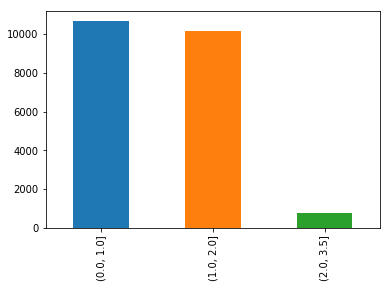

In [26]:
bins_floor.value_counts().plot(kind='bar')

In [27]:
data["floors"] = bins_floor

In [28]:
data["floors"] = data["floors"].cat.codes

In [29]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,1,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
def bin_cats(data, cat_name, bins):
    cat_bins = pd.cut(data[cat_name], bins)
    cat_bins = cat_bins.cat.as_unordered()
    print(cat_bins.value_counts())
    cat_bins.value_counts().plot(kind='bar')
    return cat_bins

In [31]:
def assign_bin_cats(data, cat, bins):
    data[cat] = bins
    data[cat] = data[cat].cat.codes
    print(data.head())

In [32]:
data.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

(3, 7]     11281
(7, 8]      6065
(8, 13]     4250
Name: grade, dtype: int64


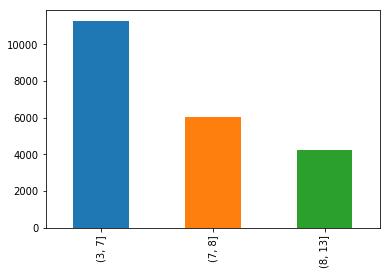

In [33]:
grade_bin = [3,7,8,13]
grade_bins = bin_cats(data, "grade", grade_bin)


In [34]:
data["grade"] = grade_bins
data["grade"] = data["grade"].cat.codes
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,NaN,0.0,...,0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,1,0.0,0.0,...,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0.0,0.0,...,0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0.0,0.0,...,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0.0,0.0,...,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
data.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

(2.0, 2.5]    7424
(1.5, 2.0]    4978
(0.5, 1.0]    3922
(2.5, 8.0]    3815
(1.0, 1.5]    1454
Name: bathrooms, dtype: int64


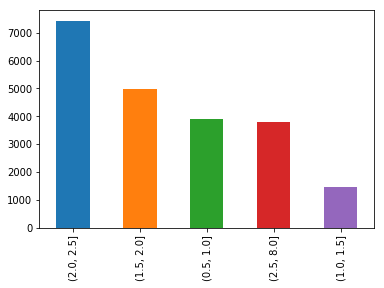

In [36]:
bath_bin = [0.5, 1,1.5,2,2.5,8]
bath_bins = bin_cats(data, "bathrooms", bath_bin)

In [37]:
assign_bin_cats(data, "bathrooms", bath_bins)

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3          0         1180   
1  6414100192   12/9/2014  538000.0         3          3         2570   
2  5631500400   2/25/2015  180000.0         2          0          770   
3  2487200875   12/9/2014  604000.0         4          4         1960   
4  1954400510   2/18/2015  510000.0         3          2         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650       0         NaN   0.0     ...          0        1180   
1      7242       1         0.0   0.0     ...          0        2170   
2     10000       0         0.0   0.0     ...          0         770   
3      5000       0         0.0   0.0     ...          0        1050   
4      8080       0         0.0   0.0     ...          1        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.511

In [38]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,0,1180,5650,0,NaN,0.0,...,0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,3,2570,7242,1,0.0,0.0,...,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,0,770,10000,0,0.0,0.0,...,0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,4,1960,5000,0,0.0,0.0,...,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,0,0.0,0.0,...,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [39]:
data.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

(2, 3]     9824
(3, 4]     6882
(1, 2]     2760
(4, 33]    1935
Name: bedrooms, dtype: int64


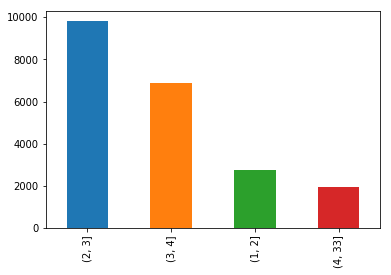

In [40]:
bedroom_bin = [1,2,3,4,33]
bedroom_bins = bin_cats(data, "bedrooms", bedroom_bin)

In [41]:
assign_bin_cats(data,"bedrooms", bedroom_bins)

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         1          0         1180   
1  6414100192   12/9/2014  538000.0         1          3         2570   
2  5631500400   2/25/2015  180000.0         0          0          770   
3  2487200875   12/9/2014  604000.0         2          4         1960   
4  1954400510   2/18/2015  510000.0         1          2         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650       0         NaN   0.0     ...          0        1180   
1      7242       1         0.0   0.0     ...          0        2170   
2     10000       0         0.0   0.0     ...          0         770   
3      5000       0         0.0   0.0     ...          0        1050   
4      8080       0         0.0   0.0     ...          1        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.511

In [42]:
data.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [43]:
# bedrooms, bathrooms, grade, floors

floor_dummy = pd.get_dummies(bins_floor, prefix="floors")
bedroom_dummy = pd.get_dummies(bedroom_bins, prefix="bedrooms")
bathroom_dummy = pd.get_dummies(bath_bins, prefix="bathrooms")
grade_dummy = pd.get_dummies(grade_bins, prefix="grade")


In [44]:
data = data.drop(["floors", "bedrooms", "bathrooms", "grade"], axis=1)

In [45]:
data = pd.concat([data, floor_dummy, bedroom_dummy, bathroom_dummy, grade_dummy], axis=1)
data.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,...,"bedrooms_(3, 4]","bedrooms_(4, 33]","bathrooms_(0.5, 1.0]","bathrooms_(1.0, 1.5]","bathrooms_(1.5, 2.0]","bathrooms_(2.0, 2.5]","bathrooms_(2.5, 8.0]","grade_(3, 7]","grade_(7, 8]","grade_(8, 13]"
0,7129300520,10/13/2014,221900.0,1180,5650,NaN,0.0,3,1180,0.0,...,0,0,1,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,0.0,3,2170,400.0,...,0,0,0,0,0,1,0,1,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,0.0,3,770,0.0,...,0,0,1,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,0.0,5,1050,910.0,...,1,0,0,0,0,0,1,1,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,0.0,3,1680,0.0,...,0,0,0,0,1,0,0,0,1,0


### CHECKING NORMALITY OF CONTINUOUS VARIABLES

In [46]:
df = data
df_cont = df[df.columns.drop(list(df.filter(regex='floor')))]
df_cont = df_cont[df_cont.columns.drop(list(df_cont.filter(regex='bedrooms')))]
df_cont = df_cont[df_cont.columns.drop(list(df_cont.filter(regex='bathrooms')))]
df_cont = df_cont[df_cont.columns.drop(list(df_cont.filter(regex='grade')))]

In [47]:
df_cont.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,1180,5650,NaN,0.0,3,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,0.0,3,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,770,10000,0.0,0.0,3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,0.0,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,0.0,3,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123acb5f8>,
      dtype=object)

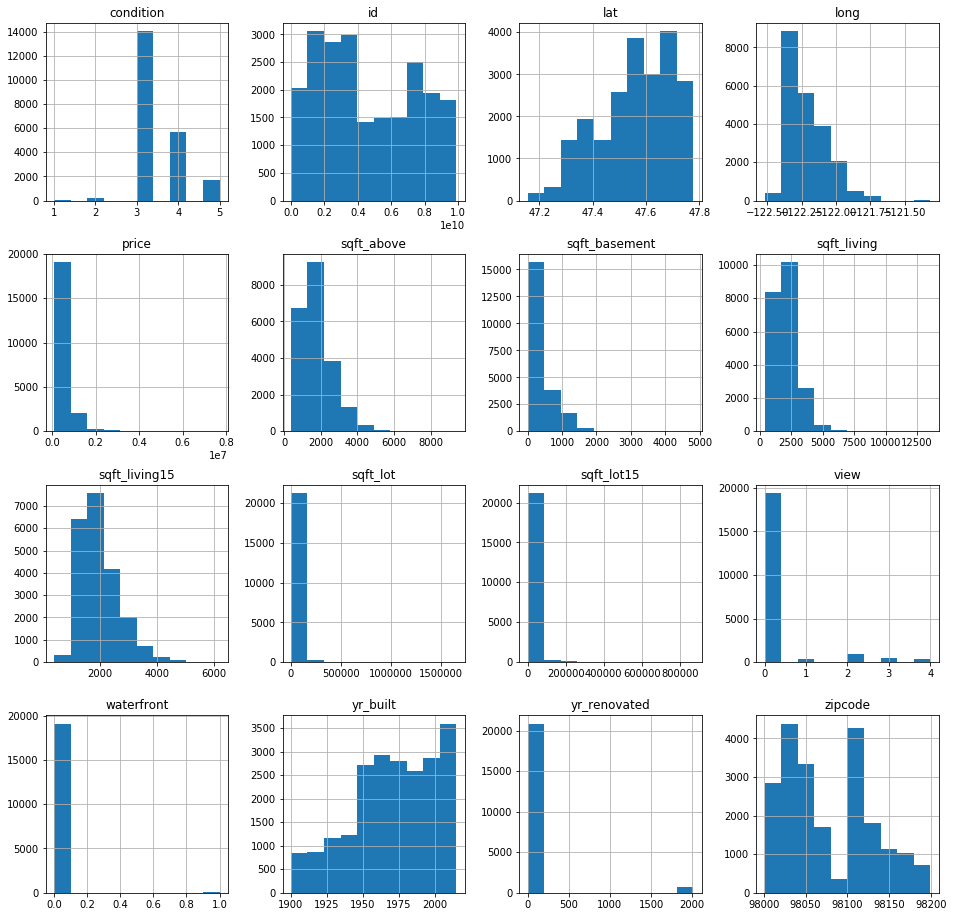

In [48]:
df_cont.hist(figsize=[16,16])

In [54]:
df_basic = data_features.drop(['view', 'waterfront', 'yr_built', 'zipcode', 'lat', 'long'], axis=1)

In [55]:
df_basic = df_basic.drop(['yr_renovated'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(4), int64(9)
memory usage: 2.1 MB


In [56]:
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import seaborn as sns

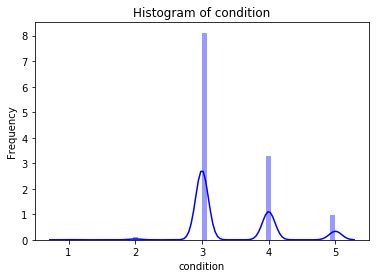

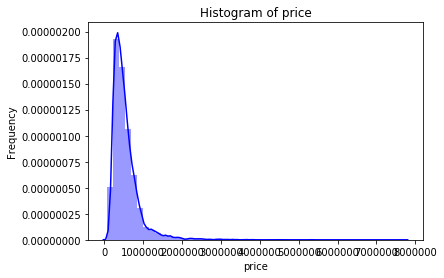

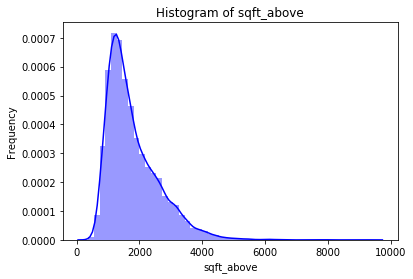

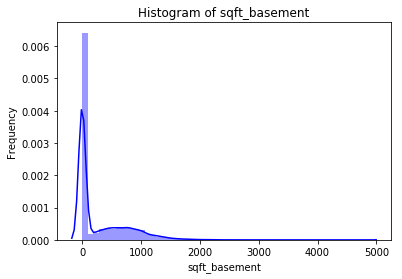

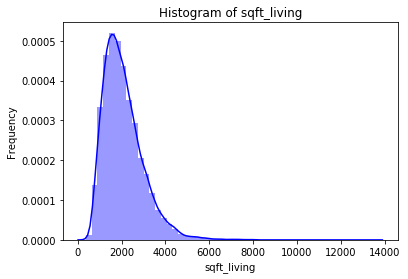

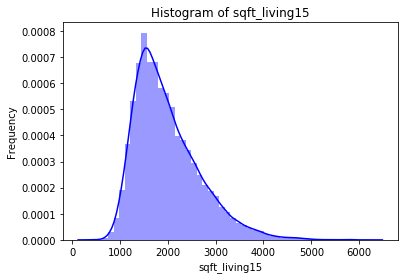

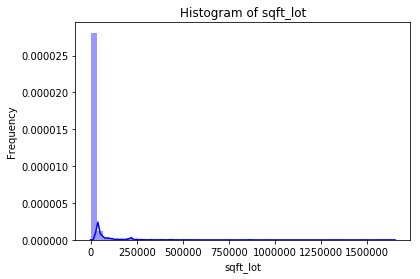

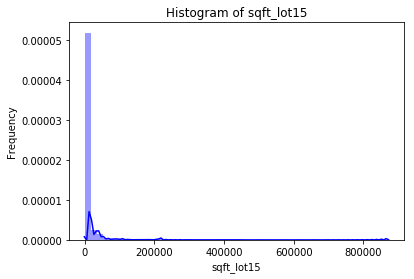

In [69]:
columns = ['condition', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df_basic[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [76]:
def log_transform(cat):
    log_cat = (cat - np.mean(cat))/np.sqrt(np.var(cat))
    return log_cat

In [78]:
log_sq_above = np.log(df_basic['sqft_above'])
# log_sq_basement = np.log(df_basic['sqft_basement'])
log_sq_living = np.log(df_basic['sqft_living'])
log_sq_living15 = np.log(df_basic['sqft_living15'])
log_sq_lot = np.log(df_basic['sqft_lot'])
log_sq_lot15 = np.log(df_basic['sqft_lot15'])

#standardization



df_log = pd.DataFrame([])

df_log["sqft_above"] = log_transform(log_sq_above)
df_log["sqft_living"] = log_transform(log_sq_living)
df_log["sqft_living15"] = log_transform(log_sq_living15)
df_log["sqft_lot"] = log_transform(log_sq_lot)
df_log["sqft_lot15"] = log_transform(log_sq_lot15)

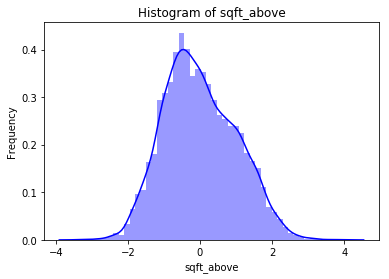

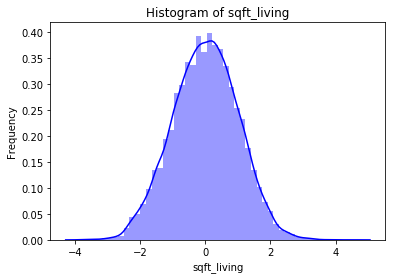

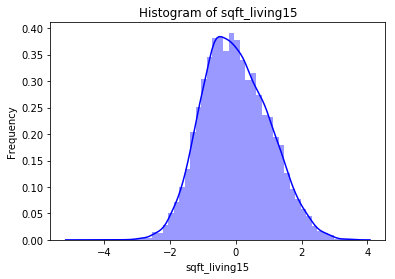

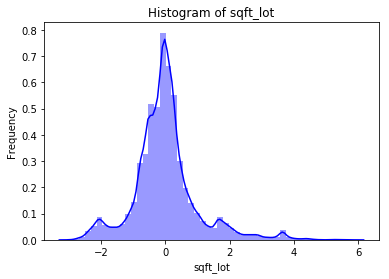

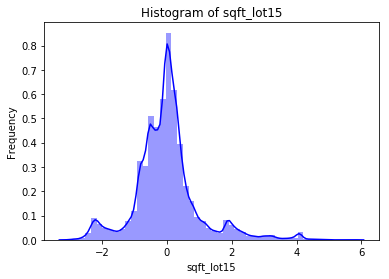

In [79]:
columns = ['sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df_log[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [104]:
price = data['price']
outcome = 'price'
data_ols = pd.concat([df_log, price, bedroom_dummy], axis=1)
data_ols.head(3)

,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,price,"bedrooms_(1, 2]","bedrooms_(2, 3]","bedrooms_(3, 4]","bedrooms_(4, 33]"
0,-0.753583,-1.125582,-1.035453,-0.388439,-0.395459,221900.0,0,1,0,0
1,0.672709,0.709463,-0.326789,-0.113243,-0.024288,538000.0,0,1,0,0
2,-1.752995,-2.131943,1.126531,0.244481,0.042037,180000.0,1,0,0,0


In [105]:
price = data['price']
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
predictors = predictors.drop('sqft_lot15', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula=formula, data=data_ols).fit()

model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)